# 데이터 전처리
## 결측치 처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'racks_f_total_dataset.csv', low_memory=False)

In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
start = pd.Timestamp('2019-01-18 00:00:00')
end   = pd.Timestamp('2019-01-19 00:00:00')

In [6]:
target = ['Time', 'Tmp', 'TmpMax', 'TmpMin', 'VCell', 'VCellMax', 'VCellMin', 'AChaMax', 'ADisChaMax', 'SoC']

In [7]:
temp_df = df[(start <= df['Time']) & (df['Time'] < end) & (df['Racks'] == 'racks_3')].loc[:, target]

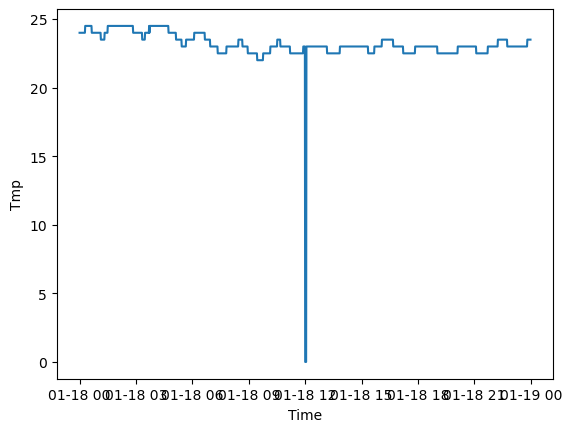

In [8]:
sns.lineplot(data=temp_df.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp')

plt.show()

In [9]:
temp_df = temp_df.replace(np.float64(0.0), np.NAN)

In [10]:
for i in temp_df.columns[1:]:
    temp_df[i] = pd.Series(temp_df[i]).interpolate()

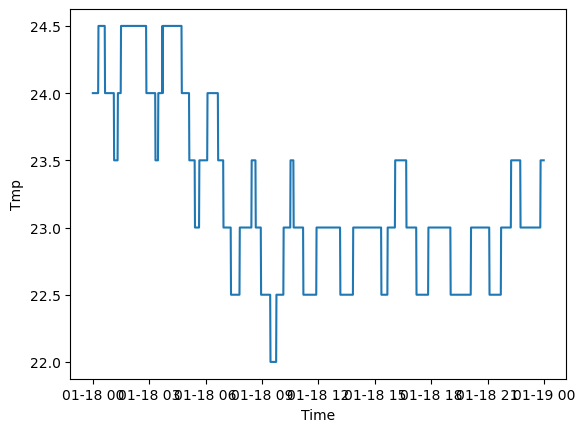

In [11]:
sns.lineplot(data=temp_df.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp')

plt.show()

In [12]:
df.loc[temp_df.index[0]:temp_df.index[-1], target] = temp_df